<a href="https://colab.research.google.com/github/hvr2026/CMPE-255-Assignment-2-LOW-CODE-ASSIGNMENTS-PART-2---pycaret-low-code-tasks/blob/main/Clustering_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 63.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [2]:
# check installed version
import pycaret
pycaret.__version__

import pandas as pd

In [3]:

data = pd.read_csv('/content/synthetic_customer_data.csv')
data.head()

,CustomerID,Age,AnnualIncome,SpendingScore,Gender
0,1,51,38150,21,Female
1,2,72,59858,92,Male
2,3,45,46075,99,Female
3,4,27,30180,86,Male
4,5,61,25508,23,Female


In [4]:
from pycaret.clustering import *
s = setup(data, session_id = 101)

,Description,Value
0,Session id,101
1,Original data shape,"(2000, 5)"
2,Transformed data shape,"(2000, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [6]:
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()
type(exp)


pycaret.clustering.oop.ClusteringExperiment

In [7]:
exp.setup(data, session_id = 106)

,Description,Value
0,Session id,106
1,Original data shape,"(2000, 5)"
2,Transformed data shape,"(2000, 5)"
3,Numeric features,4
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [8]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5257,5214.2517,0.5557,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,CustomerID,Age,AnnualIncome,SpendingScore,Gender,Cluster
0,1,51,38150,21,Female,Cluster 0
1,2,72,59858,92,Male,Cluster 2
2,3,45,46075,99,Female,Cluster 0
3,4,27,30180,86,Male,Cluster 1
4,5,61,25508,23,Female,Cluster 1
...,...,...,...,...,...,...
1995,1996,63,74032,57,Male,Cluster 3
1996,1997,65,22459,12,Male,Cluster 1
1997,1998,64,28366,73,Female,Cluster 1
1998,1999,27,50946,2,Male,Cluster 2


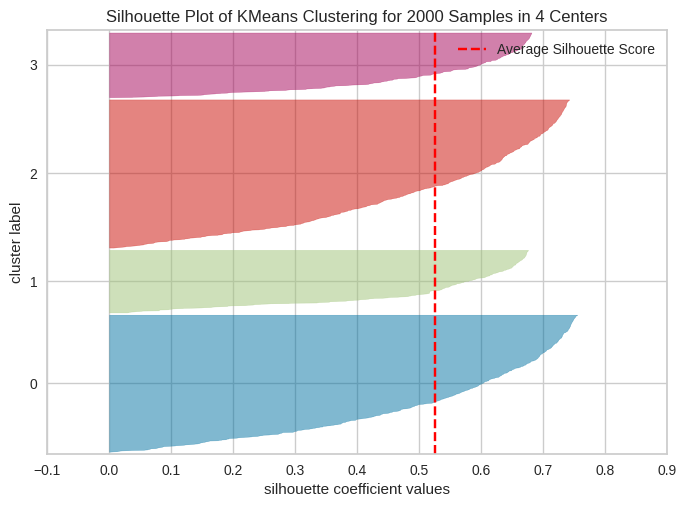

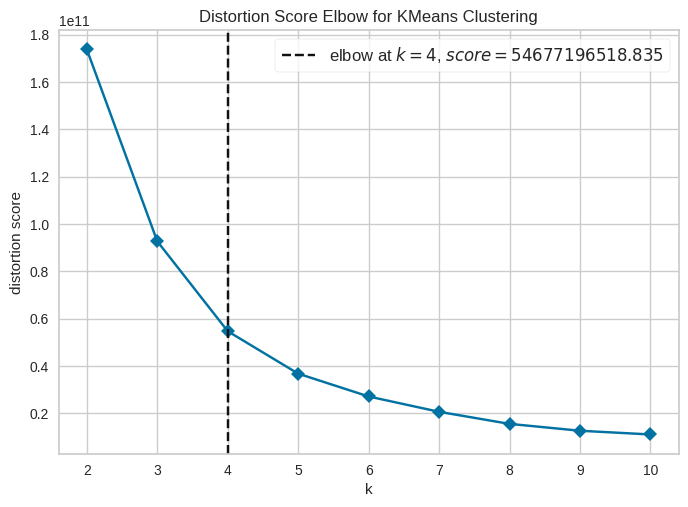

In [12]:
plot_model(kmeans, plot = 'cluster')
plot_model(kmeans, plot = 'silhouette')
plot_model(kmeans, plot = 'elbow')

In [10]:
help(plot_model)

Help on function plot_model in module pycaret.clustering.functional:

plot_model(model, plot: str = 'cluster', feature: Optional[str] = None, label: bool = False, scale: float = 1, save: bool = False, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> jewellery = get_data('jewellery')
    >>> from pycaret.clustering import *
    >>> exp_name = setup(data = jewellery)
    >>> kmeans = create_model('kmeans')
    >>> plot_model(kmeans, plot = 'cluster')
    
    
    model: scikit-learn compatible object
        Trained Model Object
    
    
    plot: str, default = 'cluster'
        List of available plots (ID - Name):
    
        * 'cluster' - Cluster PCA Plot (2d)
        * 'tsne' - Cluster t-SNE (3d)
        * 'elbow' - Elbow Plot
        * 'silhouette' - Silhouette Plot
        * 'distance' - Distance Plot
        * 'distribution

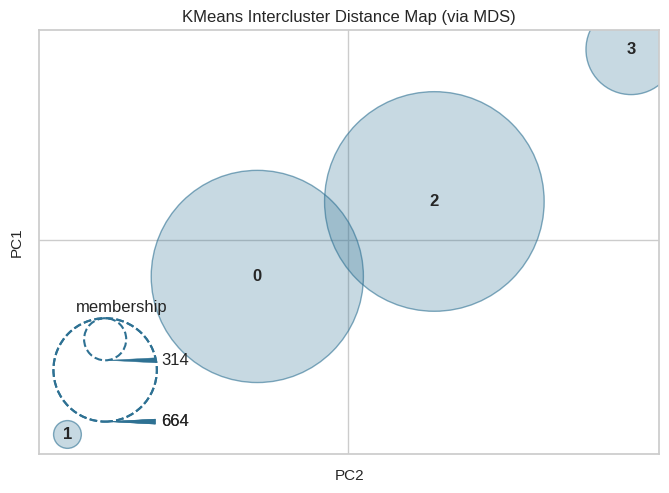

In [13]:
plot_model(kmeans, plot = 'cluster')
plot_model(kmeans, plot = 'tsne')
plot_model(kmeans, plot = 'distance')
plot_model(kmeans, plot = 'distribution')

In [16]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,CustomerID,Age,AnnualIncome,SpendingScore,Gender,Cluster
0,1.0,51.0,38150.0,21.0,0.0,Cluster 0
1,2.0,72.0,59858.0,92.0,1.0,Cluster 2
2,3.0,45.0,46075.0,99.0,0.0,Cluster 0
3,4.0,27.0,30180.0,86.0,1.0,Cluster 1
4,5.0,61.0,25508.0,23.0,0.0,Cluster 1
...,...,...,...,...,...,...
1995,1996.0,63.0,74032.0,57.0,1.0,Cluster 3
1996,1997.0,65.0,22459.0,12.0,1.0,Cluster 1
1997,1998.0,64.0,28366.0,73.0,0.0,Cluster 1
1998,1999.0,27.0,50946.0,2.0,1.0,Cluster 2


In [18]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'AnnualIncome', 'SpendingScore'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                         

In [19]:
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Age',
                                             'AnnualIncome', 'SpendingScore'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', KMeans(n_clusters=4, random_state=101))])